#### Titanic: Machine Learning from Disaster
##### 2021-1 학기, 기계학습 프로그래밍
##### 한국폴리텍대학 대구캠퍼스 AI엔지니어링

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

##### 학습데이터 로딩

In [2]:
df_train = pd.read_csv("train.csv")
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


##### 생존사 / 사망자 숫자

In [3]:
# value count로 확인
df_train["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

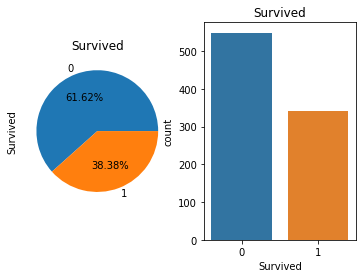

In [4]:
# 파이플롯 / 카운터 플롯으로 시각화
# 그림은 1행 2열
fig, ax = plt.subplots(1,2)

df_train["Survived"].value_counts().plot.pie(autopct='%1.2f%%', ax=ax[0])
ax[0].set_title("Survived")

sns.countplot("Survived", data=df_train,ax=ax[1])
ax[1].set_title("Survived")
plt.show()

##### 각 칼럼들 간의 상관도

In [10]:
df_train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


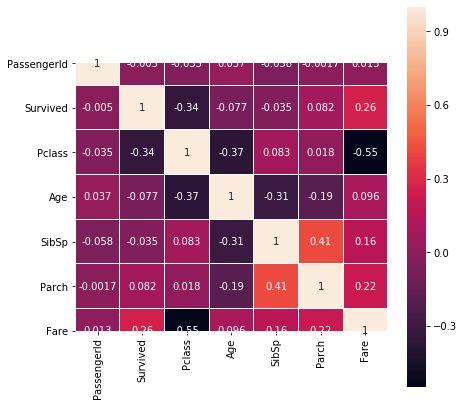

In [24]:
# 상관도 시각화, seaborn의 heatmap 사용
plt.figure(figsize=(7, 7))
sns.heatmap(df_train.corr(), linewidths=0.01, annot=True, square=True)
plt.show()